# seaborn exercises
stephen fitzsimon

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydataset
from env import get_db_url

## part I

In [41]:
sql = '''
select measurement_id, sepal_length, sepal_width, petal_length, petal_width, species_name
	from measurements
		JOIN species USING (species_id);
'''
url = get_db_url('iris_db')
df_iris = pd.read_sql(sql, url)
#df_iris = sns.load_dataset('iris')

In [42]:
#look at the db
df_iris.sample(6)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
96,97,5.7,2.9,4.2,1.3,versicolor
33,34,5.5,4.2,1.4,0.2,setosa
86,87,6.7,3.1,4.7,1.5,versicolor
26,27,5.0,3.4,1.6,0.4,setosa
31,32,5.4,3.4,1.5,0.4,setosa
122,123,7.7,2.8,6.7,2.0,virginica


In [43]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_name    150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


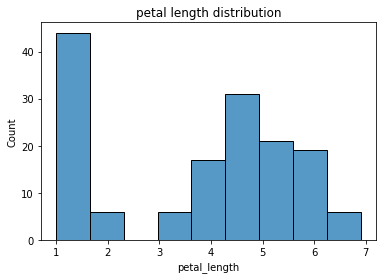

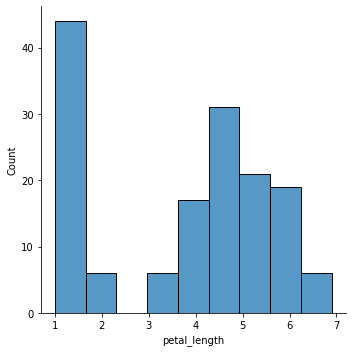

In [53]:
# 1. What does the distribution of petal lengths look like?
sns.histplot(df_iris.petal_length)
plt.title('petal length distribution')
sns.displot(df_iris.petal_length)

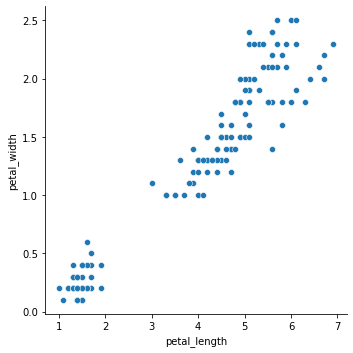

In [45]:
# 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ 
# as a hint to how we could visually determine if a correlation exists between two numeric columns.
sns.relplot(x='petal_length', y='petal_width', data=df_iris)
# there is a positive correlation

In [46]:
#numeric proof
df_iris.corr()
# r = 0.962865 is a good positive correlation

,measurement_id,sepal_length,sepal_width,petal_length,petal_width
measurement_id,1.000000,0.716676,-0.402301,0.882637,0.900027
sepal_length,0.716676,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.882637,0.871754,-0.428440,1.000000,0.962865
petal_width,0.900027,0.817941,-0.366126,0.962865,1.000000


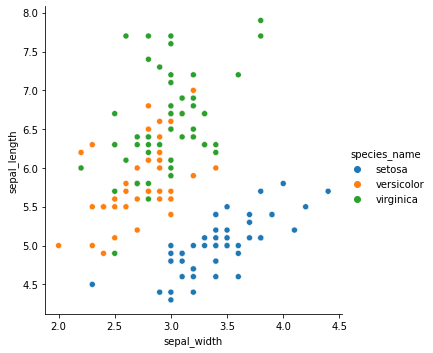

In [54]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, 
# you'll visualize two numeric columns through the lense of a categorical column.
sns.relplot(data=df_iris, x='sepal_width', y='sepal_length', hue='species_name')
#looks like setosa is grouping differently than the other two

<AxesSubplot:xlabel='species_name', ylabel='sepal_length'>

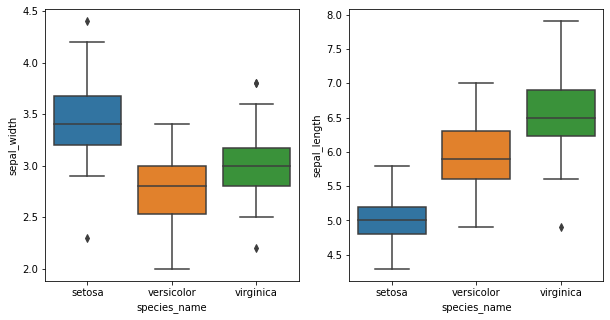

In [48]:
#might be clearer as a box plot.
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.boxplot(data=df_iris, y = 'sepal_width', x = 'species_name')

plt.subplot(122)
sns.boxplot(data=df_iris, y = 'sepal_length', x = 'species_name')

#note that ~75% of the sepal width's of setosa are higher than ~75% of virginica and versicolor
#this claim is stronger when the sepal_length is plotter.
#looks like sepal_length is a fairly good predictor of being setosa or not.
#it's seems reasonable but there is a better correlation, see 4.

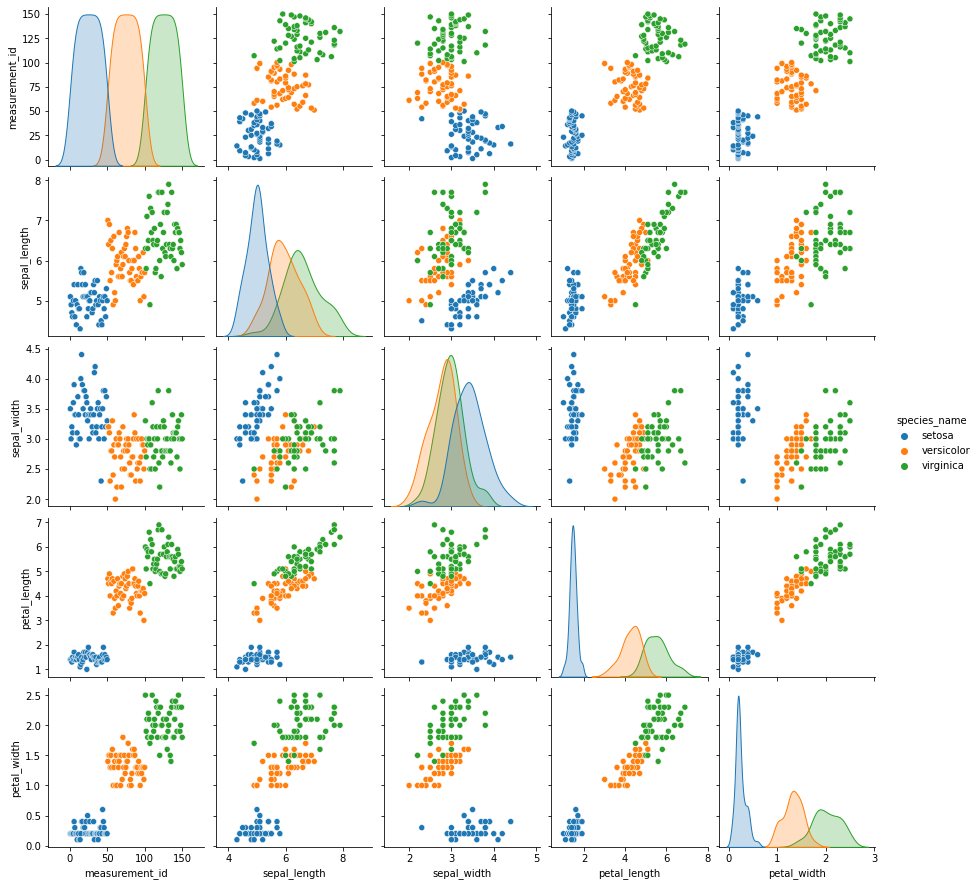

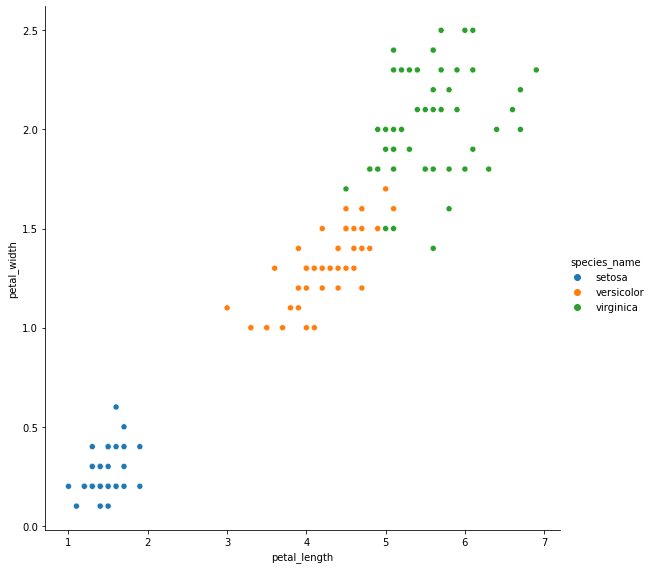

In [49]:
# 4. Which features would be best used to predict species? 
#note the following graph:
sns.relplot(x='petal_length', y='petal_width', data=df_iris, hue='species_name', height=8, aspect=1)

<AxesSubplot:xlabel='species_name', ylabel='petal_width'>

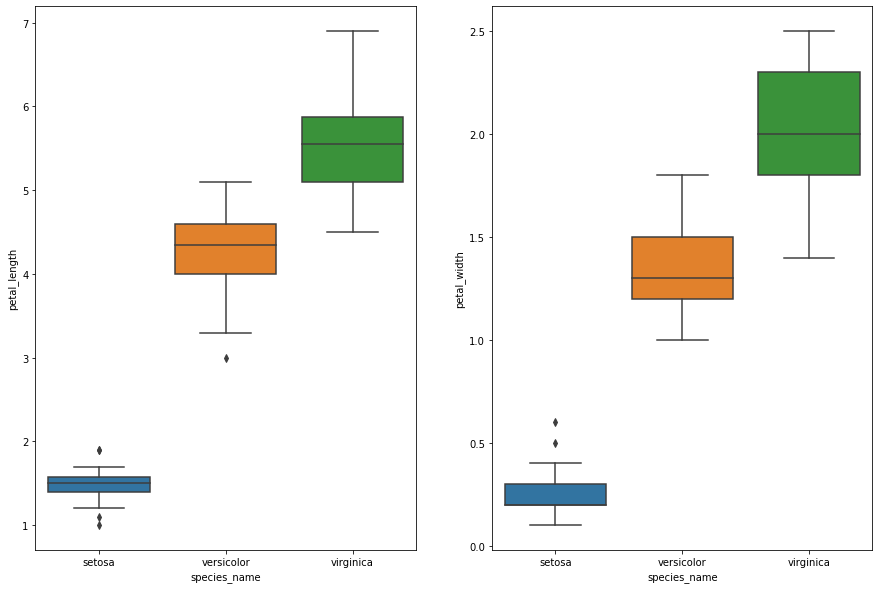

In [50]:
#also consider these graphs:
plt.figure(figsize=(15,10))

plt.subplot(121)
sns.boxplot(data=df_iris, y = 'petal_length', x = 'species_name')

plt.subplot(122)
sns.boxplot(data=df_iris, y = 'petal_width', x = 'species_name')

In [51]:
#also consider:
setosa_range = (df_iris.measurement_id[df_iris.species_name == 'setosa'].max(), df_iris.measurement_id[df_iris.species_name == 'setosa'].max())
virginica_range = (df_iris.measurement_id[df_iris.species_name == 'virginica'].max(), df_iris.measurement_id[df_iris.species_name == 'virginica'].max())
versicolor_range = (df_iris.measurement_id[df_iris.species_name == 'versicolor'].max(), df_iris.measurement_id[df_iris.species_name == 'versicolor'].max())
setosa_range, versicolor_range, virginica_range
#i.e. all the species are grouped by measurement_id

((50, 50), (100, 100), (150, 150))

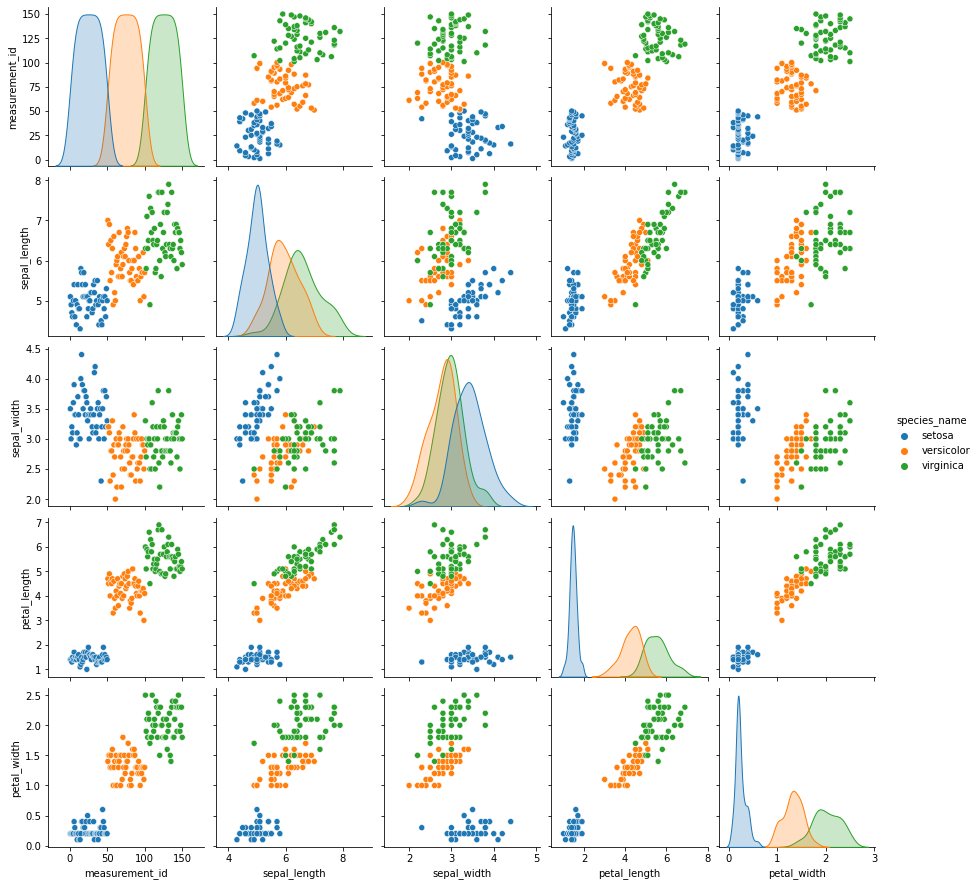

In [60]:
#finally consider the kde plots along the diagonal:
sns.pairplot(data=df_iris, hue='species_name')


It would seem that petal dimensions are fairly good at predicting species particularly when it comes to distinguishing species, and are pretty good at predicting setosa and non-setosa.  As is clear from the boxplots, all of the setosa data is lower than the versicolor and the virginica data for both petal length and width.

Another pattern to notice is that each species is groupable by measurement_id.  Therefore, given a measurement_id, it is easy see which species it belongs too.  However, this is only applicable to this particular data set and how it has been entered into the database.

## part II

In [13]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
# What do you notice?
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

df_an = sns.load_dataset('anscombe')
df_an.sample(5)
df_an[df_an.dataset=='IV'].sort_values(by='x')

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [14]:
df_an.groupby('dataset').describe().T
#the calculations for y differ in range and median/quantile values, but bascially the same in terms of mean and 
#std.  Looks like x is mostly integers and have the same stats. But looking at the sets it looks like the x
#has differing modes; at least for dataset IV

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

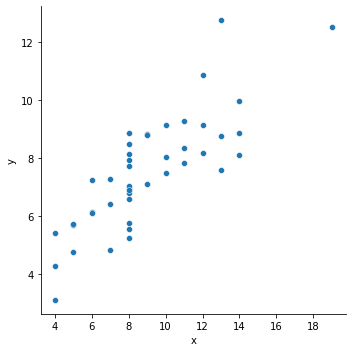

In [15]:
#plot the data in terms of x and y
sns.relplot(x= 'x', y = 'y', data=df_an)
#vertical line at x = 8 is most of the dataset IV
#can kinda see the line from III and the quadratic from II

<AxesSubplot:xlabel='x', ylabel='y'>

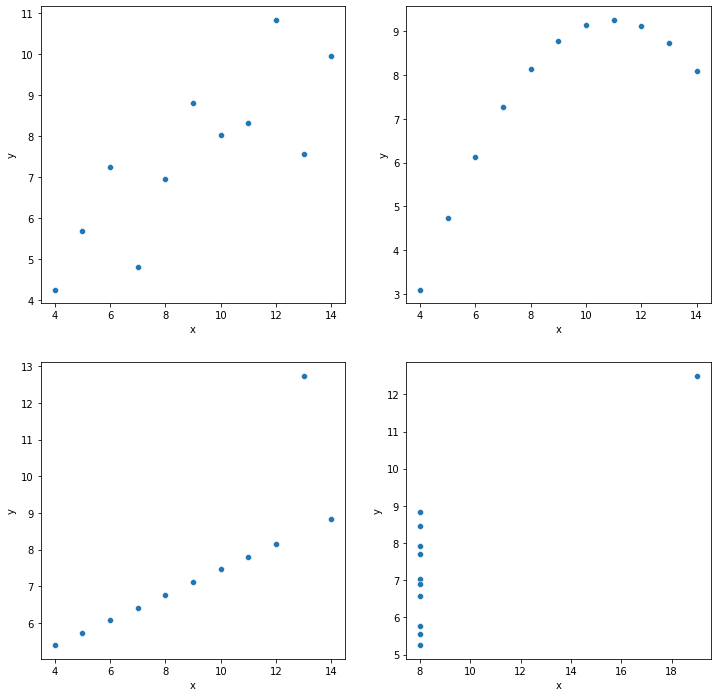

In [16]:
#plot the individual data sets
plt.figure(figsize=(12,12))

plt.subplot(221)
sns.scatterplot(data=df_an[df_an.dataset=='I'], x = 'x', y = 'y')

plt.subplot(222)
sns.scatterplot(data=df_an[df_an.dataset=='II'], x = 'x', y = 'y')

plt.subplot(223)
sns.scatterplot(data=df_an[df_an.dataset=='III'], x = 'x', y = 'y')

plt.subplot(224)
sns.scatterplot(data=df_an[df_an.dataset=='IV'], x = 'x', y = 'y')

#I is vaguely positively correlated, II looks like a quadratic, III is linear except for one point

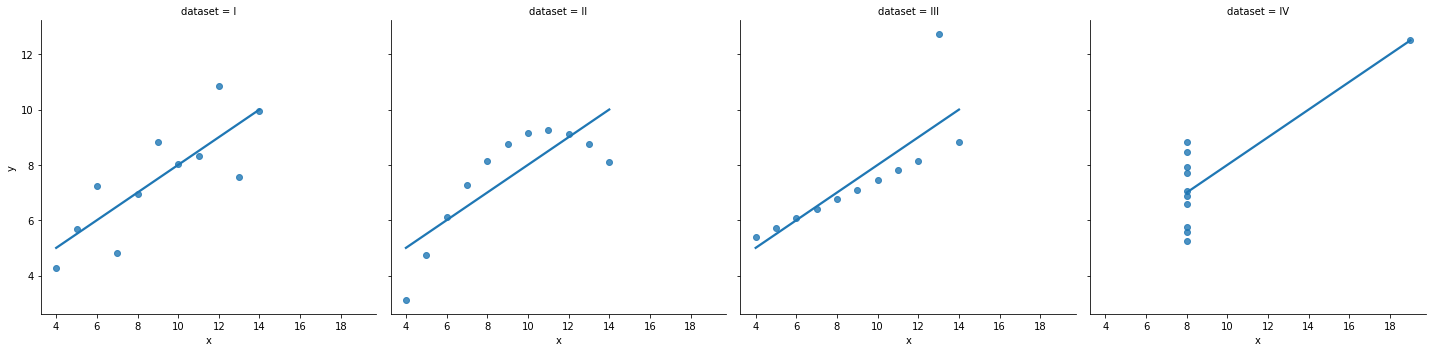

In [64]:
#plot the regression line
sns.lmplot(data=df_an, x = 'x', y= 'y', col= 'dataset', ci=0)
#note the outliers

In [67]:
df_an.groupby('dataset').corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

In [17]:
# 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness 
# of the different insect sprays.
df_insect = pydataset.data('InsectSprays')
pydataset.data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [18]:
df_insect.sample(5)

,count,spray
65,15,F
61,11,F
36,4,C
6,12,A
56,1,E


Text(0, 0.5, 'number of bugs post treatment')

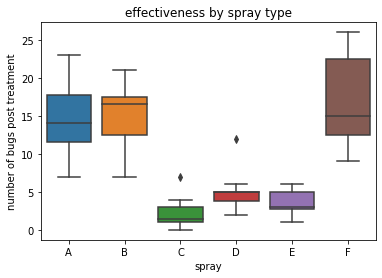

In [19]:
sns.boxplot(data=df_insect, y='count', x='spray')
plt.title('effectiveness by spray type')
plt.ylabel('number of bugs post treatment')

In [20]:
# 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather 
# than seaborn. Create visualizations to answer the following questions:

df_cheese = pydataset.data('swiss')
pydataset.data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [21]:
df_cheese.sample(5)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Grandson,71.7,34.0,17,8,3.30,20.0
Lausanne,55.7,19.4,26,28,12.11,20.2
Boudry,70.4,38.4,26,12,5.62,20.3
Val de Ruz,77.6,37.6,15,7,4.97,20.0
Rive Droite,44.7,46.6,16,29,50.43,18.2


In [22]:
# 3a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is 
# Catholic. (Choose a cutoff point for what constitutes catholic)
#the cut off for catholic is >= 60%
df_cheese['is_catholic'] = df_cheese.Catholic >= 60.0
df_cheese.sample(5)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Echallens,68.3,72.6,18,2,24.20,21.2,False
Yverdon,65.4,49.5,15,8,6.10,22.5,False
St Maurice,65.0,75.9,9,9,99.06,17.8,True
Sion,79.3,63.1,13,13,96.83,18.1,True


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

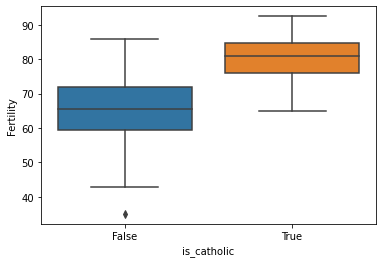

In [23]:
# 3b. Does whether or not a province is Catholic influence fertility?
#make a box plot for is_catholic = [true, false]
sns.boxplot(data=df_cheese, x='is_catholic', y='Fertility')
#looks like catholic generally has a higher fertility number.  But looks also like a lot of the two sets overlap.

In [24]:
# 3c. What measure correlates most strongly with fertility?
df_cheese.corr().Fertility.sort_values()
#Education has a negative correlation with fertility, similar with examination
#examination might represent an education exam because it and education are positively correlated.


Education          -0.663789
Examination        -0.645883
Agriculture         0.353079
Infant.Mortality    0.416556
Catholic            0.463685
is_catholic         0.605023
Fertility           1.000000
Name: Fertility, dtype: float64

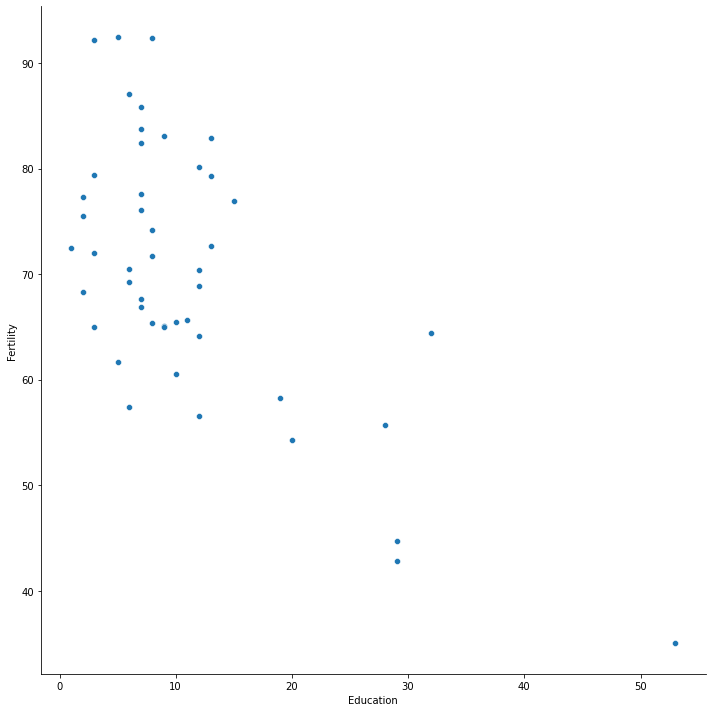

In [25]:
#plot this:
sns.relplot(data=df_cheese, x='Education', y= 'Fertility', height=10, aspect=1)

In [70]:
# 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular 
# items and the revenue produced by each.
url = get_db_url('chipotle')

sql = '''SELECT * FROM orders;'''

df_chipotle = pd.read_sql(sql, url)

In [71]:
df_chipotle.sample(5)

,id,order_id,quantity,item_name,choice_description,item_price
3418,3419,1371,2,Canned Soft Drink,[Diet Coke],$2.50
1949,1950,788,1,Steak Burrito,"[Fresh Tomato Salsa (Mild), [Rice, Fajita Veggies, Cheese, Lettuce]]",$8.99
920,921,380,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour Cream, Lettuce]]",$8.75
3823,3824,1533,2,Chicken Burrito,"[[Lettuce, Rice]]",$16.38
4222,4223,1685,1,Chicken Burrito,"[Tomatillo Green Chili Salsa, [Fajita Vegetables, Cheese, Sour Cream, Lettuce]]",$8.75


In [96]:
#item by quantity sold
quantities = df_chipotle.groupby('item_name').quantity.sum()
quantities

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [73]:
#clean up the item_price column to use in calculations
df_chipotle['item_price'] = df_chipotle.item_price.str.replace('$', '').astype(float)
df_chipotle['item_price']

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_81930/1966562313.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_chipotle['item_price'] = df_chipotle.item_price.str.replace('$', '').astype(float)


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [95]:
#get the list of unique items:
items = df_chipotle.item_name.unique()
#get the revenue per item
item_revenue = df_chipotle.groupby('item_name').item_price.sum()
item_revenue

item_name
6 Pack Soft Drink                         356.95
Barbacoa Bowl                             672.36
Barbacoa Burrito                          894.75
Barbacoa Crispy Tacos                     120.21
Barbacoa Salad Bowl                       106.40
Barbacoa Soft Tacos                       250.46
Bottled Water                             302.56
Bowl                                       29.60
Burrito                                    44.40
Canned Soda                               137.34
Canned Soft Drink                         438.75
Carnitas Bowl                             736.71
Carnitas Burrito                          597.83
Carnitas Crispy Tacos                      77.96
Carnitas Salad                              8.99
Carnitas Salad Bowl                        66.34
Carnitas Soft Tacos                       375.94
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Chicken Crispy Tacos                      472.13
Chicken Sa

<AxesSubplot:xlabel='item_name', ylabel='quantity'>

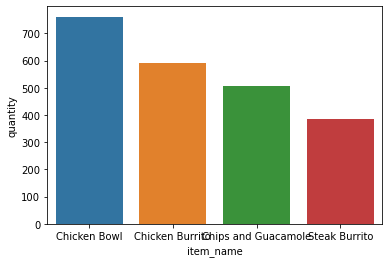

In [127]:
#plot the categorical data
merged_df = pd.merge(item_revenue, quantities, left_index=True, right_index=True).reset_index()
merged_df.sort_values('quantity', ascending=False)

sns.barplot(
    x = merged_df.sort_values('quantity', ascending=False).item_name[0:4], 
    y=merged_df.sort_values('quantity', ascending=False).quantity[0:4])

In [31]:
# 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the 
# individual subject's reaction times and a more prominant line showing the average change in reaction time.
pydataset.data('sleepstudy', show_doc=True)
df_sleepy = pydataset.data('sleepstudy')
df_sleepy.head()

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [32]:
df_sleepy.Subject.unique()

array([308, 309, 310, 330, 331, 332, 333, 334, 335, 337, 349, 350, 351,
       352, 369, 370, 371, 372])

Text(0.5, 1.0, 'Change in reaction time with average change in red')

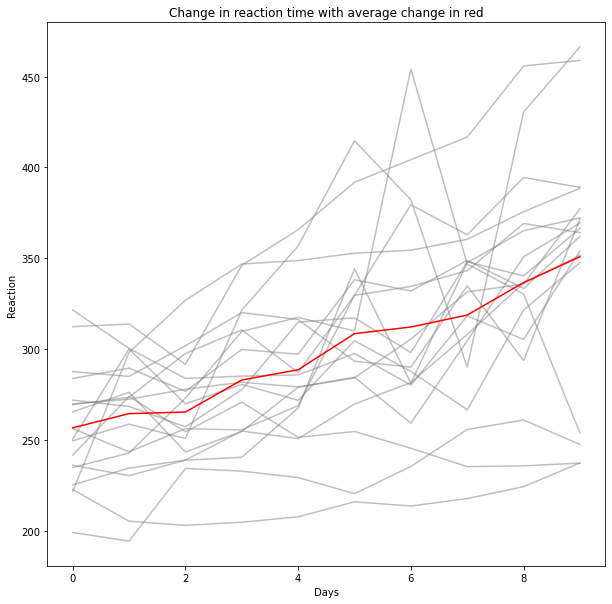

In [33]:
plt.figure(figsize=(10,10))
for subject in df_sleepy.Subject.unique():
    sns.lineplot(
                data=df_sleepy[df_sleepy.Subject == subject], 
                 x='Days', 
                 y='Reaction', 
                color= 'grey',
                alpha = 0.5
    )
#plot the mean
sns.lineplot(
    data=df_sleepy.groupby('Days').Reaction.mean(), 
    x='Days', 
    y=df_sleepy.groupby('Days').Reaction.mean(), 
    color='red'
)
plt.title('Change in reaction time with average change in red')

In [ ]:
#could also change the subject number to a category